##  Data Preprocessing / Exploratory Data Analysis 



**Activity 1: ** Read the NYC_death_causes data from **/datasets/NYC_death_causes** into variable called NYC_death_causes.

In [112]:
# Your code for activity 1 goes here..
import pandas as pd
import csv
import numpy as np
import pickle 
import json
import json
with open('../../../datasets/NYC/NYC_Causes_of_Death', 'r') as f:
    NYC_death_causes=json.load(f)
    
NYC_death_causes

{'data': [[1095,
   'EB649B90-D468-4471-A55B-8B66572E31F8',
   1095,
   1484932698,
   '399231',
   1484932698,
   '399231',
   None,
   '2014',
   'Diabetes Mellitus (E10-E14)',
   'F',
   'Other Race/ Ethnicity',
   '11',
   '.',
   '.'],
  [1096,
   '47B92A6A-2EB4-48B3-A7F4-0AF00EBE4105',
   1096,
   1484932698,
   '399231',
   1484932698,
   '399231',
   None,
   '2011',
   'Cerebrovascular Disease (Stroke: I60-I69)',
   'M',
   'White Non-Hispanic',
   '290',
   '21.7',
   '18.2'],
  [1097,
   'FC47920F-22D9-415D-A4C2-463D3F8C918F',
   1097,
   1484932698,
   '399231',
   1484932698,
   '399231',
   None,
   '2008',
   'Malignant Neoplasms (Cancer: C00-C97)',
   'M',
   'Not Stated/Unknown',
   '60',
   '.',
   '.'],
  [1098,
   '3CF03BB4-BB37-4E6D-9E41-F7C36EDAD1FB',
   1098,
   1484932698,
   '399231',
   1484932698,
   '399231',
   None,
   '2010',
   'Malignant Neoplasms (Cancer: C00-C97)',
   'F',
   'Hispanic',
   '1045',
   '85.9',
   '98.5'],
  [1099,
   'EE1E1741-4019-46A

**Activity 2: ** Normalize the json formatted data in NYC_death_causes and save the result to NYC_data variable.

In [113]:
# Your code for activity 2 goes here..
from pandas.io.json import json_normalize

nyc_data=pd.io.json.json_normalize(NYC_death_causes,'data') # parameter data is passed because we only want the contents 
                                                    # of data tag
nyc_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1095,EB649B90-D468-4471-A55B-8B66572E31F8,1095,1484932698,399231,1484932698,399231,None,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,.,.
1,1096,47B92A6A-2EB4-48B3-A7F4-0AF00EBE4105,1096,1484932698,399231,1484932698,399231,None,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290,21.7,18.2
2,1097,FC47920F-22D9-415D-A4C2-463D3F8C918F,1097,1484932698,399231,1484932698,399231,None,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60,.,.
3,1098,3CF03BB4-BB37-4E6D-9E41-F7C36EDAD1FB,1098,1484932698,399231,1484932698,399231,None,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045,85.9,98.5
4,1099,EE1E1741-4019-46A3-BEDC-6EC23ED4CAB3,1099,1484932698,399231,1484932698,399231,None,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170,19.9,23.3


**Activity 3: ** Extract names of columns from the tags "meta/view/columns/" and save them in a list called names. Exclude the names from list which start with a ':' in the begining. 

In [114]:
# Your code for activity 3 goes here..
import numpy as np

# fieldnames are present in the json object structure meta->view->columns->fieldname. So find the length of columns tag.
length = len(NYC_death_causes["meta"]["view"]["columns"])

names = []

for i in range(0, length):
    names.append(NYC_death_causes["meta"]["view"]["columns"][i]["fieldName"])

names

[':sid',
 ':id',
 ':position',
 ':created_at',
 ':created_meta',
 ':updated_at',
 ':updated_meta',
 ':meta',
 'year',
 'leading_cause',
 'sex',
 'race_ethnicity',
 'deaths',
 'death_rate',
 'age_adjusted_death_rate']

In [115]:
names=[word for word in names if not ':' in word]
names

['year',
 'leading_cause',
 'sex',
 'race_ethnicity',
 'deaths',
 'death_rate',
 'age_adjusted_death_rate']

**Activity 4: ** Drop the columns 0 through 7 from NYC_data and assign the result back to NYC_data.

In [116]:
nyc_data.drop(nyc_data.columns[[0,1,2,3,4,5,6,7]], axis=1, inplace=True)
nyc_data

,8,9,10,11,12,13,14
0,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,.,.
1,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290,21.7,18.2
2,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60,.,.
3,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045,85.9,98.5
4,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170,19.9,23.3
5,2007,Mental and Behavioral Disorders due to Use of ...,M,Not Stated/Unknown,.,.,.
6,2011,All Other Causes,F,Not Stated/Unknown,14,.,.
7,2007,Chronic Lower Respiratory Diseases (J40-J47),F,Black Non-Hispanic,163,15.5,14.8
8,2012,Essential Hypertension and Renal Diseases (I10...,F,Hispanic,101,8.2,9.5
9,2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1382,123.1,227.9


**Activity 5: ** Rename the columns with the extracted names to replace the default numbered column names.

In [117]:
names[:]

['year',
 'leading_cause',
 'sex',
 'race_ethnicity',
 'deaths',
 'death_rate',
 'age_adjusted_death_rate']

In [118]:
nyc_data.rename(index=str, columns={8: names[0], 9: names[1], 10: names[2], 11: names[3], 12: names[4], 13: names[5],\
                              14:names[6]},inplace=True)
nyc_data[:5]

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,.,.
1,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290,21.7,18.2
2,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60,.,.
3,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045,85.9,98.5
4,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170,19.9,23.3


**Activity 6: ** Draw a countplot for the number of NaN values in each row. This is similar to what is done in the lab.

The proportion of entries with non-NaN values is 100.00%


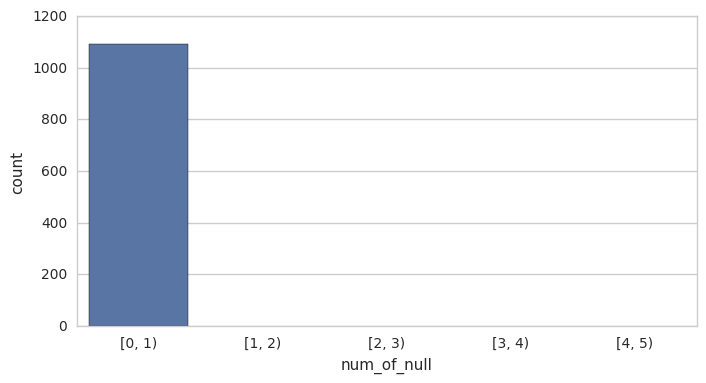

In [119]:
# Your code for activity 6 goes here..
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


num_data = nyc_data.iloc[0:, :7]

num_data['num_of_null'] = num_data.isnull().sum(axis=1)

print('The proportion of entries with non-NaN values is {:.2f}%'.format(len(num_data[num_data.num_of_null==0])/len(num_data)*100))

bins = [0,1,2,3,4,5]

# make bins of data in num_of_null using pandas.cut() function. The bin ranges are specified in bins variable.  
cut = pd.cut(num_data.num_of_null, bins=bins, include_lowest=True, right=False)
fig, axis1 = plt.subplots(1,figsize=(8,4))
sns.countplot(x=cut, data=cut.to_frame(), ax=axis1)

sns.plt.show()



**Activity 7: ** Replace ".." present in rows with a valid NAN and re draw the above plot. 

The proportion of entries with non-NaN values is 64.72%


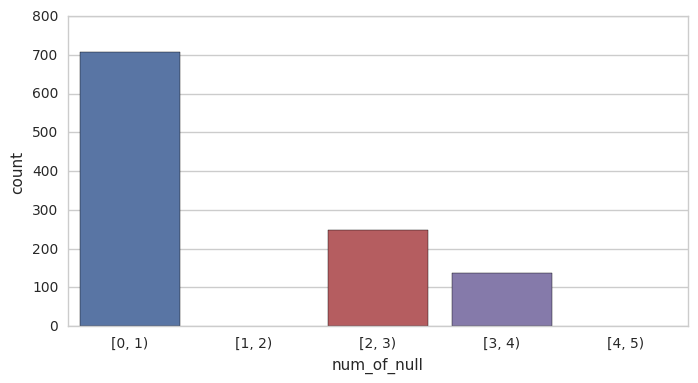

In [120]:
# Your code for activity 7 goes here..

nyc_data = nyc_data.replace('.', np.nan)

num_data = nyc_data.iloc[0:, :7]

num_data['num_of_null'] = num_data.isnull().sum(axis=1)

print('The proportion of entries with non-NaN values is {:.2f}%'.format(len(num_data[num_data.num_of_null==0])/len(num_data)*100))

bins = [0,1,2,3,4,5]

# make bins of data in num_of_null using pandas.cut() function. The bin ranges are specified in bins variable.  
cut = pd.cut(num_data.num_of_null, bins=bins, include_lowest=True, right=False)
fig, axis1 = plt.subplots(1,figsize=(8,4))
sns.countplot(x=cut, data=cut.to_frame(), ax=axis1)

sns.plt.show()



In [121]:
data.shape

(1094, 7)

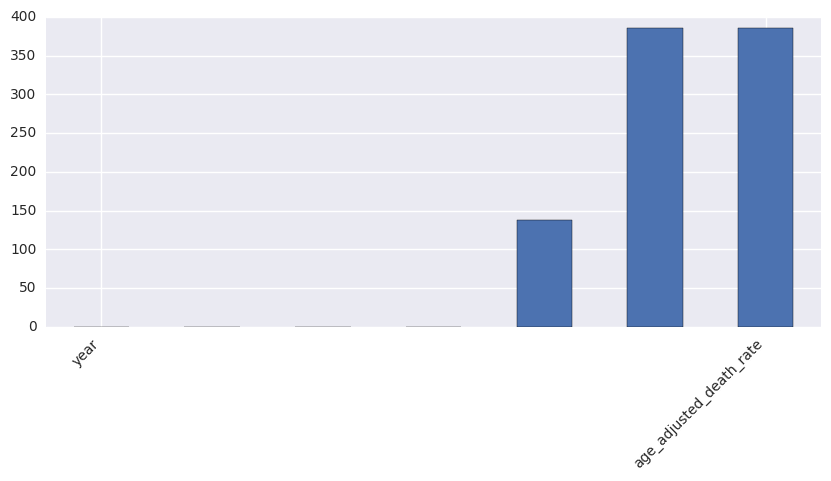

In [122]:
num_of_null_each_month = num_data.drop('num_of_null', axis=1).isnull().sum()

sns.set_style("darkgrid")
plt.figure(figsize=(10,4))

# A bar graph representing number of null value cells in each column.
pbar = num_of_null_each_month.plot.bar()

# The first argument to xticks is the position of tick marks. Second argument is actual labels to be displayed at those positions
plt.xticks(list(range(0,len(num_of_null_each_month.index),6)), list(num_of_null_each_month.index[0::6]), rotation=45, ha='right')
plt.show()


**Activity 8: ** Fill the NAN values in the dataset using median values of columns. Make sure to have the column names right. 

In [123]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
# from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set_style('whitegrid')
num_data

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate,num_of_null
0,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,NaN,NaN,2
1,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290,21.7,18.2,0
2,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60,NaN,NaN,2
3,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045,85.9,98.5,0
4,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170,19.9,23.3,0
5,2007,Mental and Behavioral Disorders due to Use of ...,M,Not Stated/Unknown,NaN,NaN,NaN,3
6,2011,All Other Causes,F,Not Stated/Unknown,14,NaN,NaN,2
7,2007,Chronic Lower Respiratory Diseases (J40-J47),F,Black Non-Hispanic,163,15.5,14.8,0
8,2012,Essential Hypertension and Renal Diseases (I10...,F,Hispanic,101,8.2,9.5,0
9,2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1382,123.1,227.9,0


In [124]:
num_data[['deaths','death_rate', 'age_adjusted_death_rate', 'num_of_null']] = num_data[['deaths','death_rate', 'age_adjusted_death_rate', 'num_of_null']].apply(pd.to_numeric)

num_data.head()

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate,num_of_null
0,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11.0,NaN,NaN,2
1,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290.0,21.7,18.2,0
2,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60.0,NaN,NaN,2
3,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045.0,85.9,98.5,0
4,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170.0,19.9,23.3,0


In [125]:
num_data.iloc[0:, 4:]

,deaths,death_rate,age_adjusted_death_rate,num_of_null
0,11.0,NaN,NaN,2
1,290.0,21.7,18.2,0
2,60.0,NaN,NaN,2
3,1045.0,85.9,98.5,0
4,170.0,19.9,23.3,0
5,NaN,NaN,NaN,3
6,14.0,NaN,NaN,2
7,163.0,15.5,14.8,0
8,101.0,8.2,9.5,0
9,1382.0,123.1,227.9,0


In [126]:
num_data_median = short_data.copy()
imp_median = Imputer(missing_values='NaN', strategy='median', axis=1, copy=False)
imp_median.fit_transform(num_data_median)

array([[   11. ,     6.5,     6.5,     2. ],
       [  290. ,    21.7,    18.2,     0. ],
       [   60. ,    31. ,    31. ,     2. ],
       ..., 
       [   25. ,    13.5,    13.5,     2. ],
       [ 1230. ,   144.5,   166.2,     0. ],
       [   36. ,     5.8,     6.3,     0. ]])

In [127]:
short_data = nyc_data.iloc[0:, 4:]
short_data['num_of_null'] = short_data.isnull().sum(axis=1)
imp_median.fit_transform(short_data)

array([[   11. ,     6.5,     6.5,     2. ],
       [  290. ,    21.7,    18.2,     0. ],
       [   60. ,    31. ,    31. ,     2. ],
       ..., 
       [   25. ,    13.5,    13.5,     2. ],
       [ 1230. ,   144.5,   166.2,     0. ],
       [   36. ,     5.8,     6.3,     0. ]])

In [128]:
short_df = pd.DataFrame(imp_median.fit_transform(short_data))
new_df.head()

itrp_shrt_median = Imputer(missing_values='NaN', strategy='median', axis=1, copy=False)

# Get the first five columns and save it in head to append to modified data.
head_cols = num_data.copy().iloc[:,0:4]
head_cols.head()

result_fill = pd.concat([head_cols, pd.DataFrame(itrp_shrt_median.fit_transform(short_data),index=short_data.index)],axis=1)
result_fill.shape

(1094, 8)

In [129]:
result_fill.head(5)

,year,leading_cause,sex,race_ethnicity,0,1,2,3
0,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11.0,6.5,6.5,2.0
1,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290.0,21.7,18.2,0.0
2,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60.0,31.0,31.0,2.0
3,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045.0,85.9,98.5,0.0
4,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170.0,19.9,23.3,0.0


In [130]:
columns = ['year','leading_cause','sex','race_ethnicity','deaths', 'death_rate', 'age_adjusted_death_rate', 'num_null'] 

# Rename columns 
result_fill.columns=columns
result_fill.head()

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate,num_null
0,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11.0,6.5,6.5,2.0
1,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290.0,21.7,18.2,0.0
2,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60.0,31.0,31.0,2.0
3,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045.0,85.9,98.5,0.0
4,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170.0,19.9,23.3,0.0


In [59]:
med_fill_df = nyc_data.groupby(data.columns, axis = 1).transform(lambda x: x.fillna(x.median()))
med_fill_df.head()

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,18.35,NaN
1,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290,21.7,18.2
2,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60,18.35,NaN
3,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045,85.9,98.5
4,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170,19.9,23.3


In [60]:

med_fill_df["age_adjusted_death_rate"].fillna(med_fill_df["age_adjusted_death_rate"].median(), inplace=True)

med_fill_df.head() 


,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,18.35,20.35
1,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290,21.7,18.2
2,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60,18.35,20.35
3,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045,85.9,98.5
4,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170,19.9,23.3


**Activity 9: ** Find all rows where number of deaths are greater than 3 standard deviations from average. 

In [132]:
from scipy import stats
import numpy as np
result_fill.describe()

,deaths,death_rate,age_adjusted_death_rate,num_null
count,1094.000000,1094.000000,1094.000000,1094.000000
mean,388.859232,38.039945,38.055119,0.831810
std,835.645511,65.380144,59.797297,1.162487
min,3.000000,2.400000,2.500000,0.000000
25%,14.000000,5.500000,5.500000,0.000000
50%,100.000000,14.000000,15.450000,0.000000
75%,271.000000,30.475000,30.425000,2.000000
max,7050.000000,491.400000,350.700000,3.000000


In [133]:
result_fill[(np.abs(stats.zscore(result_fill[["deaths"]])) > 3).all(axis=1)]

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate,num_null
61,2010,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3408.0,254.1,216.6,0.0
79,2007,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3356.0,250.9,213.7,0.0
119,2010,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,White Non-Hispanic,5351.0,374.2,189.2,0.0
190,2009,Malignant Neoplasms (Cancer: C00-C97),F,White Non-Hispanic,3346.0,232.9,159.0,0.0
195,2011,Malignant Neoplasms (Cancer: C00-C97),F,White Non-Hispanic,3371.0,238.0,161.1,0.0
218,2013,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,White Non-Hispanic,4535.0,319.0,160.6,0.0
358,2008,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,White Non-Hispanic,5503.0,410.0,342.3,0.0
369,2009,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3236.0,240.5,205.6,0.0
403,2008,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,White Non-Hispanic,6836.0,476.2,245.5,0.0
423,2011,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3222.0,241.6,206.1,0.0


**Activity 10: ** Draw a scatter plot between the columns deaths and death rate. Use "leading_cause" as the color label for points. EXplain the graph briefly in below markdown cell. 

`Hint`: Use [ggplot library](http://ggplot.yhathq.com/docs/index.html)

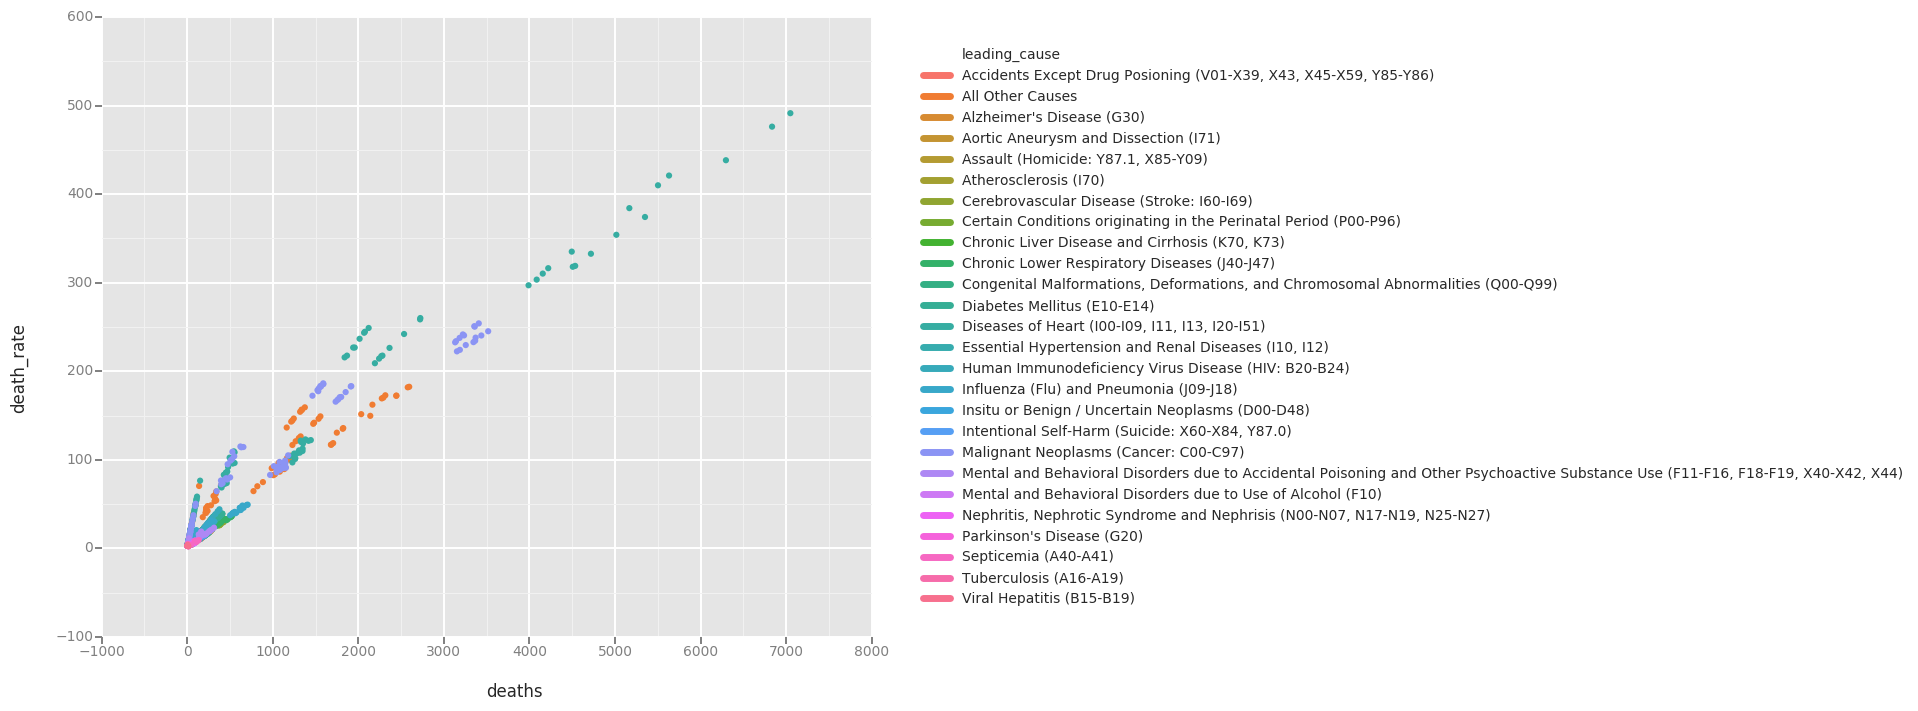

<ggplot: (-9223363305075138556)>

In [134]:
# Your code for activity 10 goes here..
from ggplot import *
ggplot(result_fill, aes(x='deaths', y='death_rate', color='leading_cause')) + geom_point()


It appears some of the blue/green classified causes of death the most frequent reasons for death.  These might include Chronic diseases, diabetes, heart disease, etc.... 

**Activity 11: ** Draw a histogram for deaths by year.

`Hint`: Use pandas datframe histogram functions

**Reference: ** [pandas visualizations](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html)

In [135]:
result_fill.head(2)

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate,num_null
0,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11.0,6.5,6.5,2.0
1,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290.0,21.7,18.2,0.0


In [148]:
import matplotlib.pyplot as plt
sum_df = result_fill.groupby(['year'])["deaths"].sum()
sum_df

year
2007    54074.0
2008    54195.0
2009    52886.0
2010    52571.0
2011    52798.0
2012    52456.0
2013    53405.0
2014    53027.0
Name: deaths, dtype: float64

In [100]:
df4 = pd.DataFrame(sum_df)
df4.head()

,deaths
year,
2007,54074.0
2008,54195.0
2009,52886.0
2010,52571.0
2011,52798.0


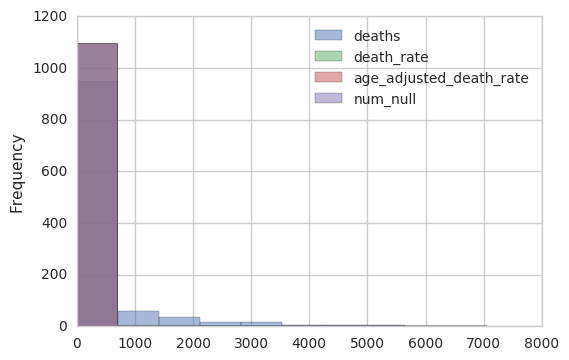

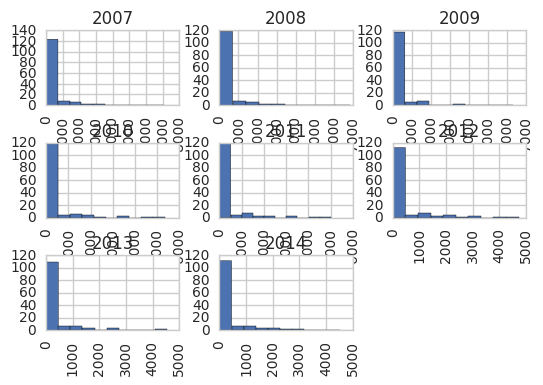

In [175]:
%matplotlib inline
result_fill.plot.hist(alpha=0.5)
result_fill.hist(column='deaths',by='year');

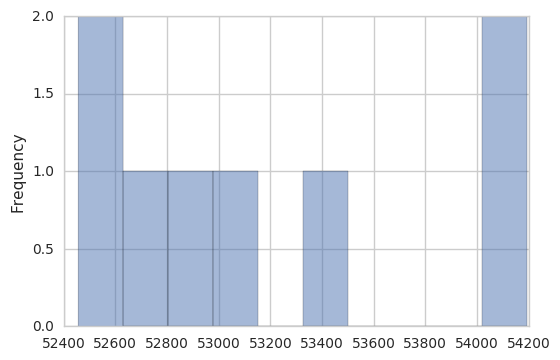

In [153]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
sum_df.plot.hist(alpha=0.5)

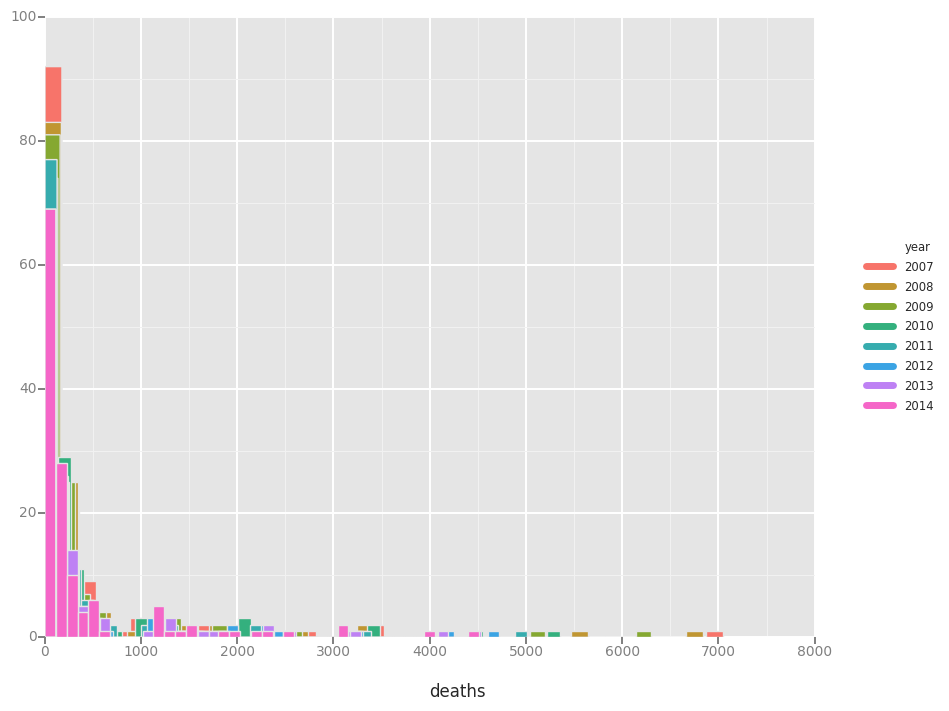

<ggplot: (-9223363305084589508)>

In [176]:
ggplot(result_fill, aes(x='deaths', fill='year')) + geom_histogram(bins=40) 

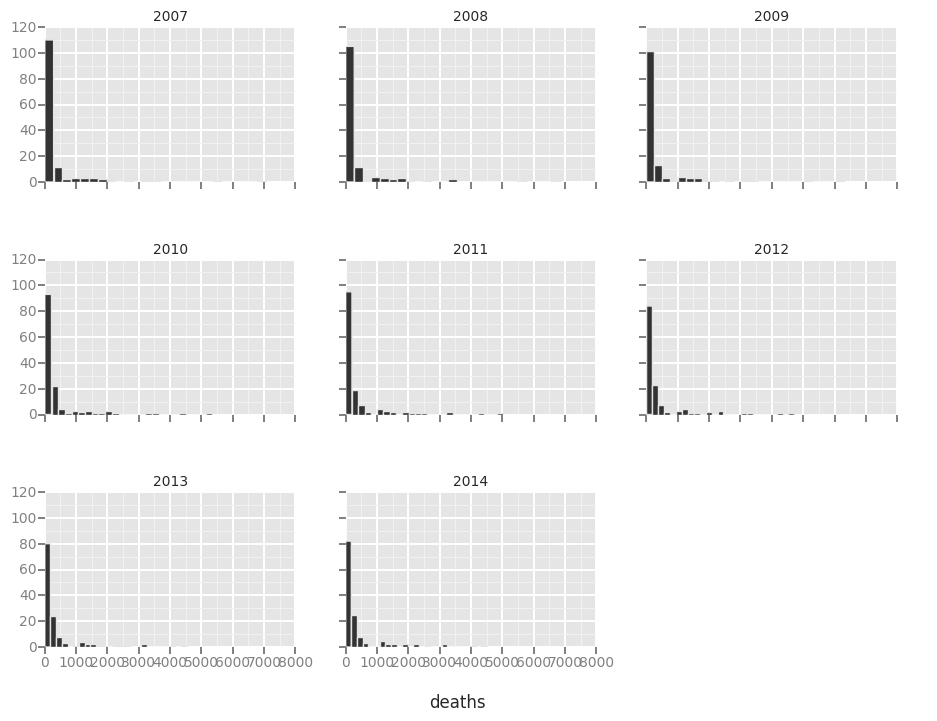

<ggplot: (8731765072090)>

In [169]:
ggplot(result_fill, aes(x='deaths')) + geom_histogram(bins=25) + facet_wrap('year')

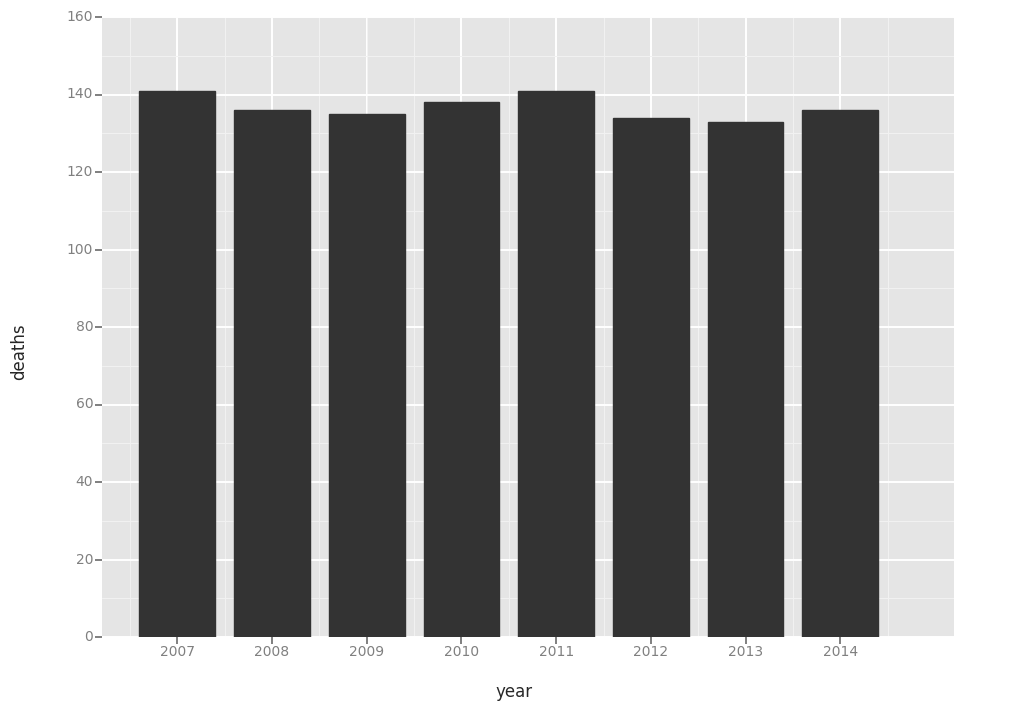

<ggplot: (8731767163319)>

In [163]:
ggplot(result_fill, aes(x='year', y='deaths')) + geom_bar()

**Activity 12: ** Draw a box plot for deaths by year again. Give your thoughts on the plot in below markdown cell. 

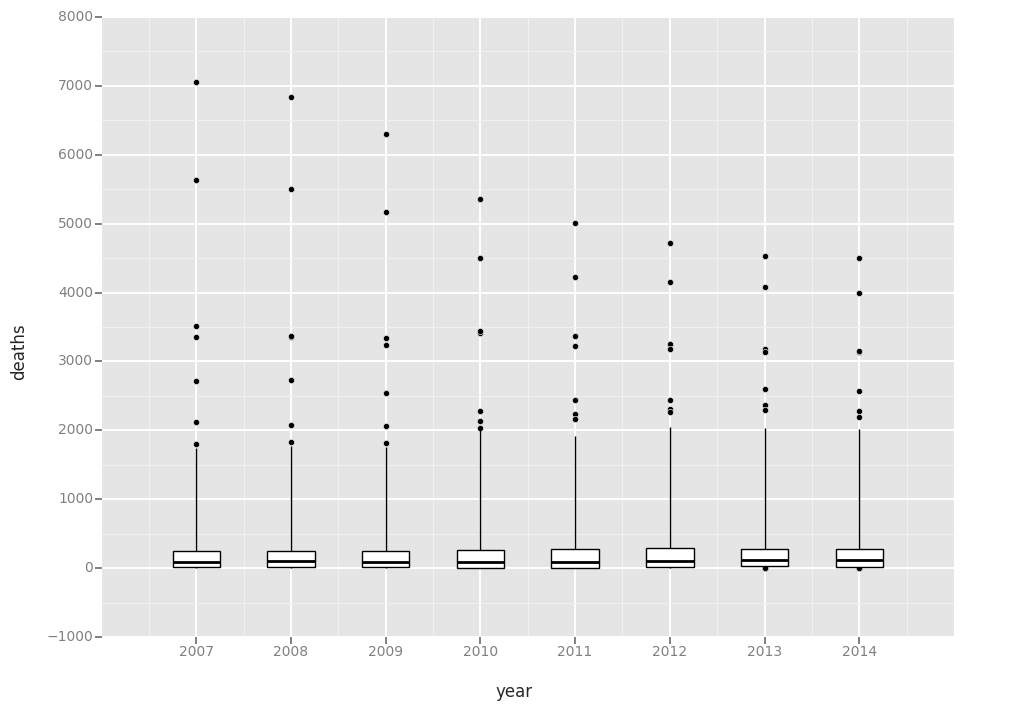

<ggplot: (-9223363305083554097)>

In [178]:
ggplot(result_fill, aes(x='year', y='deaths')) + geom_boxplot()


`Your answer for activity 12 goes here..

It appears the number of deaths per year is pretty consistent over time - between 130-140 per year.  There were definately a few outliers in early years, but as you get closer to 2014 there are fewer outliers in the 4th quartile of data.  Knowing the counts are similar year after year might help you predict deaths in future years. 